In [1]:
import rebound
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema
import astropy
from astropy.time import Time

import sys
sys.path.append('/Users/jackson/Desktop/T-Type Orbits/')

from copy import deepcopy
from IPython import display
from ttype_functions import ttype
from ttype_functions import quick_analysis
import sympy as sp
from scipy.signal import periodogram
from astropy.timeseries import LombScargle
import astropy.units as u

import pint.models
import pint.fitter
import pint.residuals
import pint.simulation
pint.logging.setup(level="WARNING")

tau = 2 * np.pi
pi = np.pi
c = 299792458 / 149597870691 # speed of light in AU/s
j = complex(0, 1)


convert_tcb2tdb=True
tcb2tdb_scale_factor=<Quantity 2.99792458e+08 m / (AU s)>
name='PX'

convert_tcb2tdb=True
tcb2tdb_scale_factor=<Quantity 1.>
name='PMRA'

convert_tcb2tdb=True
tcb2tdb_scale_factor=<Quantity 1.>
name='PMDEC'

convert_tcb2tdb=True
tcb2tdb_scale_factor=<Quantity 1.>
name='F0'

convert_tcb2tdb=True
tcb2tdb_scale_factor=<Quantity 4149.37759336 cm3 MHz2 s / pc>
name='DM'

convert_tcb2tdb=True
tcb2tdb_scale_factor=<Quantity 4149.37759336 cm3 MHz2 s / pc>
name='DM1'

convert_tcb2tdb=False
tcb2tdb_scale_factor=None
name='RM'

convert_tcb2tdb=False
tcb2tdb_scale_factor=None
name='CHI2'

convert_tcb2tdb=False
tcb2tdb_scale_factor=None
name='CHI2R'

convert_tcb2tdb=False
tcb2tdb_scale_factor=None
name='TRES'

convert_tcb2tdb=False
tcb2tdb_scale_factor=None
name='DMRES'



In [2]:
rn_parfile = "/Users/jackson/Desktop/T-Type Orbits/NANOGrav15yr_PulsarTiming_v2.0.0/red_noise_and_injected/J0023+0923_PINT_20220301_red_noise_specified.nb.par"
timfile = "/Users/jackson/Desktop/T-Type Orbits/NANOGrav15yr_PulsarTiming_v2.0.0/narrowband/tim/J0023+0923_PINT_20220301.nb.tim"
model_base, toas_base = pint.models.get_model_and_toas(rn_parfile, timfile)

convert_tcb2tdb=False
tcb2tdb_scale_factor=None
name='TZRFRQ'

convert_tcb2tdb=True
tcb2tdb_scale_factor=<Quantity 2.99792458e+08 m / (AU s)>
name='PX'

convert_tcb2tdb=True
tcb2tdb_scale_factor=<Quantity 1.>
name='PMRA'

convert_tcb2tdb=True
tcb2tdb_scale_factor=<Quantity 1.>
name='PMDEC'

convert_tcb2tdb=True
tcb2tdb_scale_factor=<Quantity 2.99792458e+08 m / (AU s)>
name='PX'

convert_tcb2tdb=True
tcb2tdb_scale_factor=<Quantity 1.>
name='PMELONG'

convert_tcb2tdb=True
tcb2tdb_scale_factor=<Quantity 1.>
name='PMELAT'

convert_tcb2tdb=True
tcb2tdb_scale_factor=<Quantity 1.>
name='PB'

convert_tcb2tdb=True
tcb2tdb_scale_factor=<Quantity 1.>
name='PBDOT'

convert_tcb2tdb=True
tcb2tdb_scale_factor=<Quantity 3.33564095e-09 s / m>
name='A1'

convert_tcb2tdb=True
tcb2tdb_scale_factor=<Quantity 3.33564095e-09 s / m>
name='A1DOT'

convert_tcb2tdb=True
tcb2tdb_scale_factor=<Quantity 1.>
name='ECC'

convert_tcb2tdb=True
tcb2tdb_scale_factor=<Quantity 1.>
name='EDOT'

convert_tcb2tdb=True
tcb2tdb

In [3]:
model = deepcopy(model_base)
toas = deepcopy(toas_base)
# model.JUMP1.value = 0

model.JUMP1.value = 0
mjds_unsorted = toas.get_mjds().value

sorted_indices = np.argsort(mjds_unsorted)
toas = toas[sorted_indices]
mjds = toas.get_mjds().value

In [4]:
ntoas = len(mjds)
toaerrs = toas.table["error"].value * u.us
toas_perfect_base = pint.simulation.make_fake_toas_fromMJDs(
    MJDs=mjds * u.d,  # applying the mask here considerably cuts down on runtime
    model=model,
    obs="arecibo",
    error= toaerrs,
    freq=toas.table["freq"].value * u.MHz,
    add_noise=True,
    add_correlated_noise = True
)
mjds_perfect = toas_perfect_base.get_mjds().value

WARNING  (pint.logging                  ): /Users/jackson/Desktop/Pint_Personal/PINT/src/pint/models/noise_model.py:399 UserWarning: ECORR maskParameter(ECORR1 -f 430_ASP 0.14868254626576202 (us) frozen=True) has no TOAs
WARNING  (pint.logging                  ): /Users/jackson/Desktop/Pint_Personal/PINT/src/pint/models/noise_model.py:399 UserWarning: ECORR maskParameter(ECORR2 -f 430_PUPPI 0.06098112468192903 (us) frozen=True) has no TOAs
WARNING  (pint.logging                  ): /Users/jackson/Desktop/Pint_Personal/PINT/src/pint/models/noise_model.py:399 UserWarning: ECORR maskParameter(ECORR3 -f L-wide_ASP 0.014962114916849168 (us) frozen=True) has no TOAs
WARNING  (pint.logging                  ): /Users/jackson/Desktop/Pint_Personal/PINT/src/pint/models/noise_model.py:399 UserWarning: ECORR maskParameter(ECORR4 -f L-wide_PUPPI 0.02558162283754653 (us) frozen=True) has no TOAs
WARNING  (pint.logging                  ): /Users/jackson/Desktop/Pint_Personal/PINT/src/pint/models/nois

In [5]:
toas_perfect = deepcopy(toas_perfect_base)

rms=6.1653968650893455853


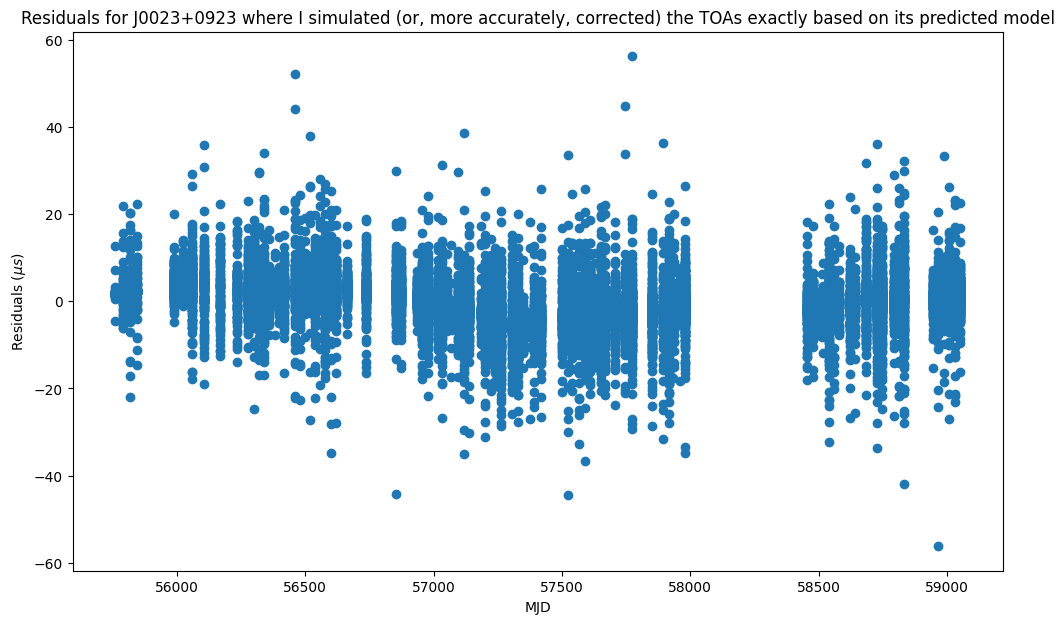

In [6]:
r_perfect = pint.residuals.Residuals(toas_perfect, model).time_resids.to(u.us).value

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(mjds_perfect, r_perfect, 'o')
ax.set_xlabel(f"MJD")
ax.set_ylabel("Residuals ($\mu s$)")
ax.set_title("Residuals for J0023+0923 where I simulated (or, more accurately, corrected) the TOAs exactly based on its predicted model")

rms = np.sqrt(np.mean(r_perfect**2))
print(f"{rms=}")

In [7]:
model_copy = deepcopy(model)

for i in range(len(toas)):
    toas_perfect.table[i]["flags"] = toas.table[i]["flags"] # some model parameters depend on the flags of the TOAs so I'm keeping the TOA flags

model_copy.remove_component("PLRedNoise")
model_copy.remove_component("PhaseOffset")



fitter = pint.fitter.WLSFitter(toas_perfect, model_copy)
fitter.fit_toas(maxiter=4)
model_fit = fitter.model
residuals_fit = pint.residuals.Residuals(toas_perfect, model_fit).time_resids.to(u.us).value




rms=5.6273341555533828292


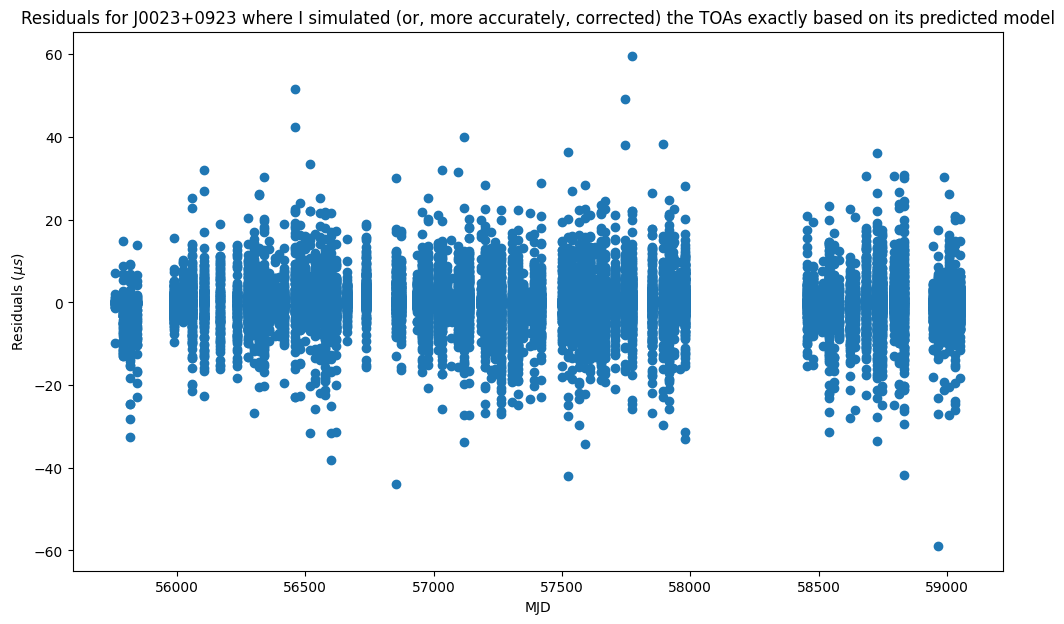

In [8]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(mjds_perfect, residuals_fit, 'o')
ax.set_xlabel(f"MJD")
ax.set_ylabel("Residuals ($\mu s$)")
ax.set_title("Post-fit Residuals for J0023+0923 where I simulated (or, more accurately, corrected) the TOAs exactly based on its predicted model")

rms = np.sqrt(np.mean(residuals_fit**2))
print(f"{rms=}")

In [9]:
toas_perfect.write_TOA_file("J0023+0923_synthetic_no_signal.tim")
print("tim filed saved")
with open("J0023+0923_synthetic_no_signal.par", "w") as file:
    file.write(model_fit.as_parfile())
print("par file saved")

tim filed saved
par file saved


# Below, I inject the trojan signal

In [10]:
toas_injected = deepcopy(toas_perfect)
model_injected = deepcopy(model_fit)
mjds_injected = toas_injected.get_mjds().value


In [11]:
mc_min = 0.016388

f_b = model.FB0.value # no factor of 86400 because ENTERPRISE uses units of seconds for TOAs
if f_b is None:
    P_b_days = model.PB.value
    P_b_seconds = P_b_days * 86400 # TODO: check this conversion number
    f_b = 1 / P_b_seconds

n_b = f_b * np.pi*2
# n_b = f_b * np.pi*2

kappa = (1.4 - mc_min) / (1.4 + mc_min)
nu_min = 1/10 * n_b/2 * np.sqrt(2 - np.sqrt(27*kappa**2 - 23))
nu_max = n_b * np.sqrt(2)/2
nu = nu_max * 0.9

t = mjds_injected * 86400
B = 1e-5
phi_plus = 1
phi_minus = pi

trojan_residuals = B * (np.cos((n_b+nu)*t + phi_plus) + np.cos((n_b - nu)*t + phi_minus)) # in seconds
mjd_cont = np.linspace(min(mjds_injected), max(mjds_injected), int(1e6))
t_cont = mjd_cont * 86400
trojan_residuals_cont = B * (np.cos((n_b+nu)*t_cont + phi_plus) + np.cos((n_b - nu)*t_cont + phi_minus)) * 1e6 # in us


In [12]:
toas_injected.adjust_TOAs(trojan_residuals * u.s)
mjds_injected = toas_injected.get_mjds().value

rms=10.964608422365618938


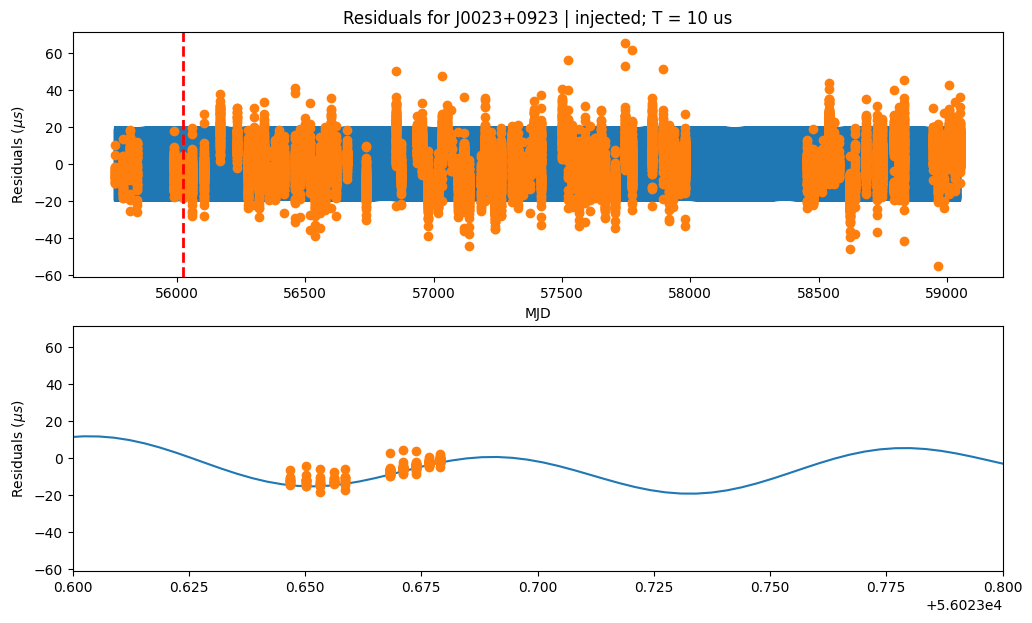

In [13]:
mjds_injected = toas_injected.get_mjds().value
# toas_injected.tzr = True
residuals_injected = pint.residuals.Residuals(toas_injected, model_injected).time_resids.to(u.us).value
fig, axs = plt.subplots(2, figsize=(12, 7))
ax = axs[0]
ax.plot(mjd_cont, trojan_residuals_cont)
ax.plot(mjds_perfect, residuals_injected, 'o')
ax.set_xlabel(f"MJD")
ax.set_ylabel("Residuals ($\mu s$)")
ax.set_title("Residuals for J0023+0923 | injected; T = 10 us")
ax.axvline(x=56023.6, color="r", linestyle="--", linewidth=2, label="zoom in area")

ax = axs[1]
ax.plot(mjd_cont, trojan_residuals_cont)
ax.plot(mjds_perfect, residuals_injected, 'o')
ax.set_xlim(56023.6, 56023.8)
ax.set_ylabel("Residuals ($\mu s$)")


rms = np.sqrt(np.mean(residuals_injected**2))
print(f"{rms=}")

In [14]:
model_copy = deepcopy(model_injected)
fitter = pint.fitter.WLSFitter(toas_injected, model_copy)
fitter.fit_toas(maxiter=4)
model_fit = fitter.model
residuals_fit = pint.residuals.Residuals(toas_injected, model_fit).time_resids.to(u.us).value

rms=9.2166865734456190715


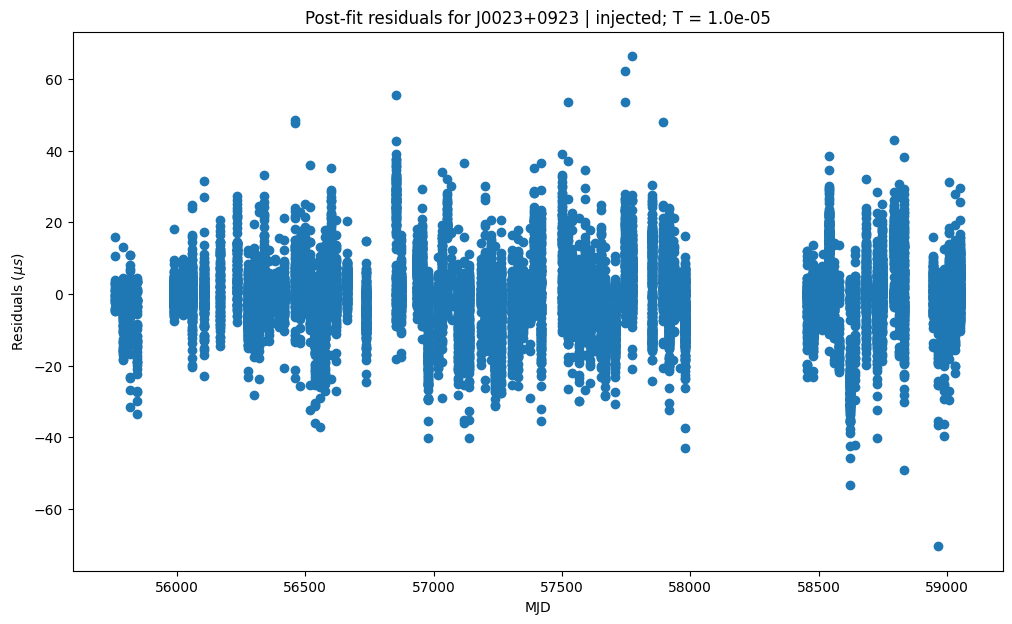

In [15]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(mjds_injected, residuals_fit, 'o')
ax.set_xlabel(f"MJD")
ax.set_ylabel("Residuals ($\mu s$)")
ax.set_title(f"Post-fit residuals for J0023+0923 | injected; T = {B:.1e}")

rms = np.sqrt(np.mean(residuals_fit**2))
print(f"{rms=}")

In [16]:
B_name = int(-np.log10(B))
toas_injected.write_TOA_file(f"J0023+0923_synthetic_injected{B_name}.tim")
print("tim filed saved")
with open(f"J0023+0923_synthetic_injected{B_name}.par", "w") as file:
    file.write(model_fit.as_parfile())
print("par file saved")

tim filed saved
par file saved


B = 1.0e-08 s = 1.0e-02 us


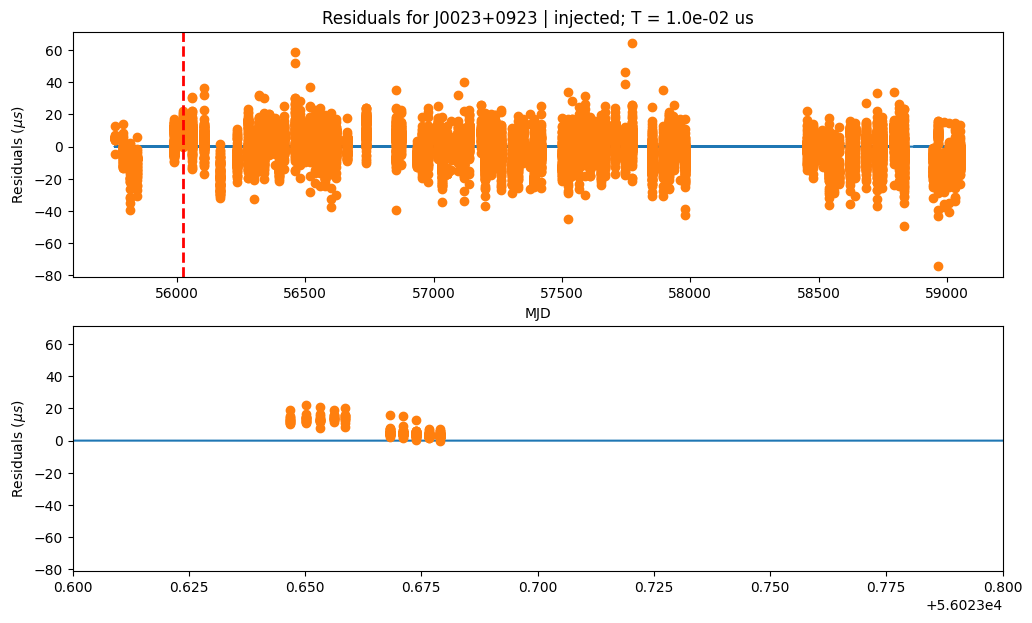

rms=8.760837639810187587 us


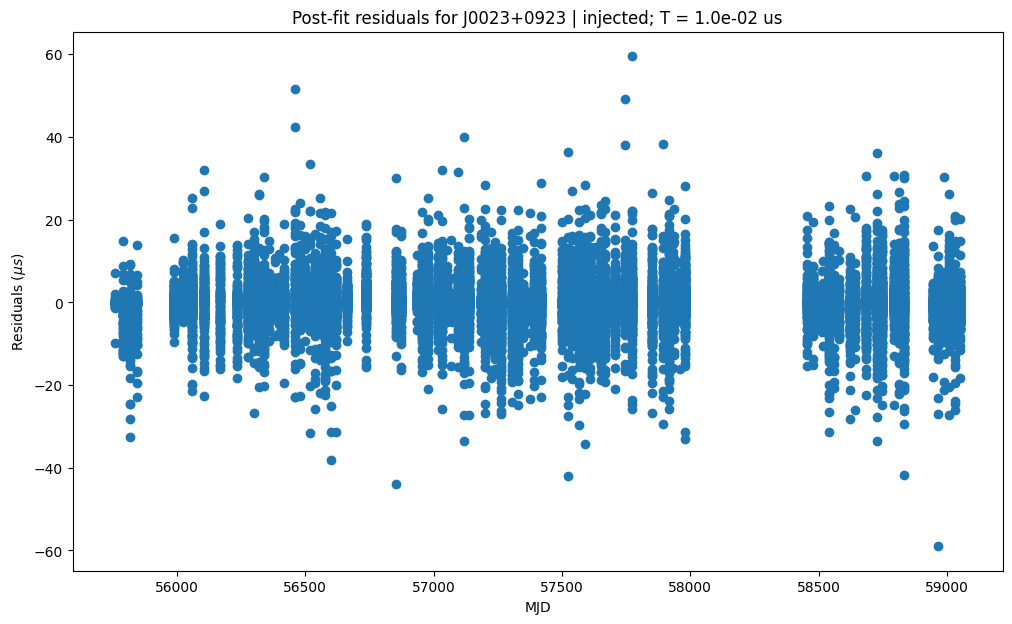

rms=5.627431001937577436 us
tim filed saved
par file saved



B = 1.0e-07 s = 1.0e-01 us


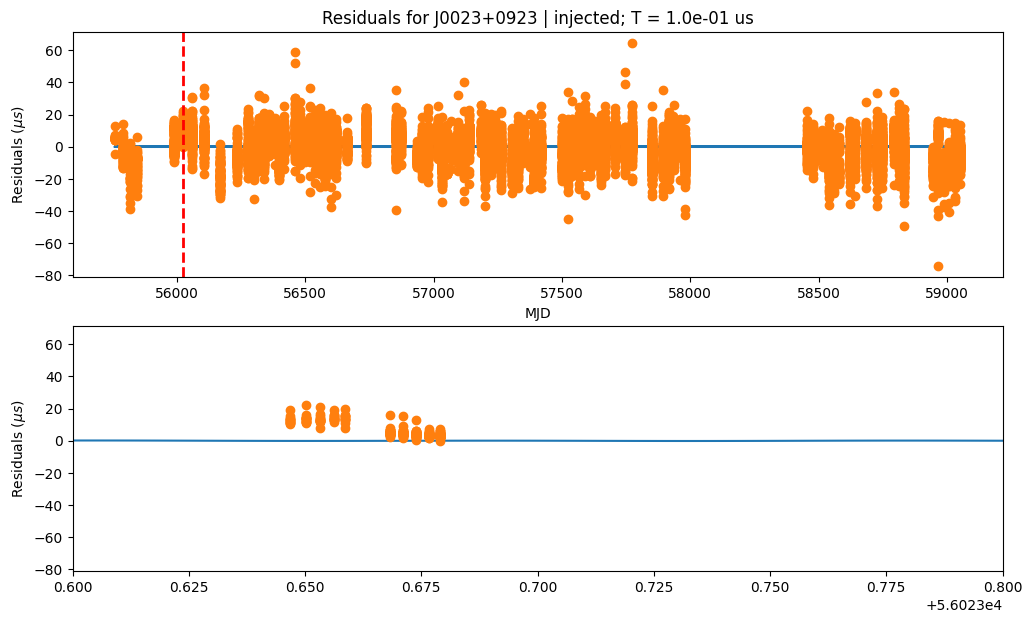

rms=8.719198927933200697 us


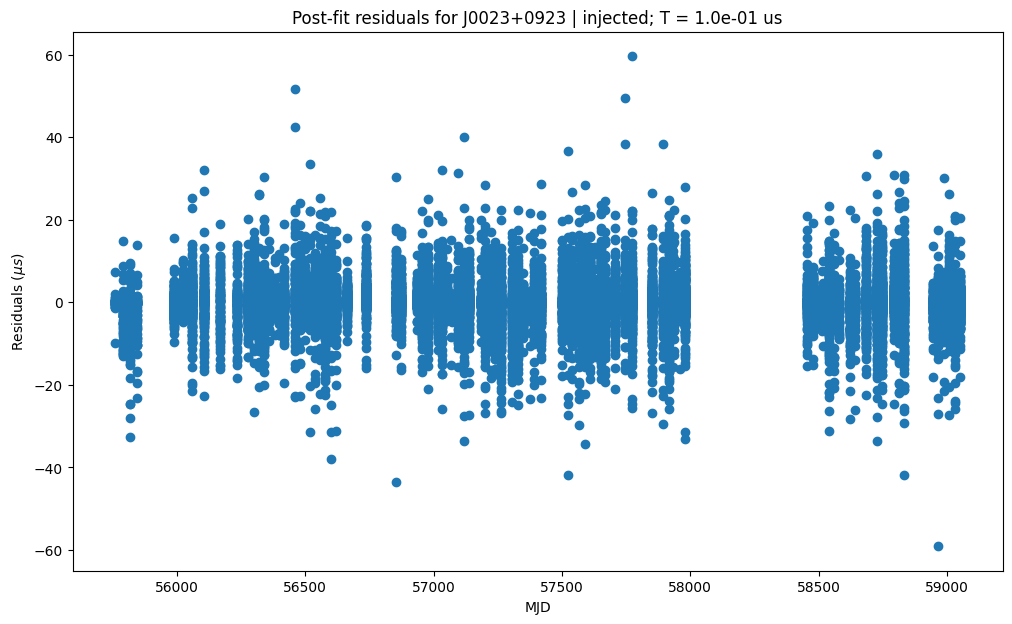

rms=5.6287152137500101137 us
tim filed saved
par file saved



B = 1.0e-06 s = 1.0e+00 us


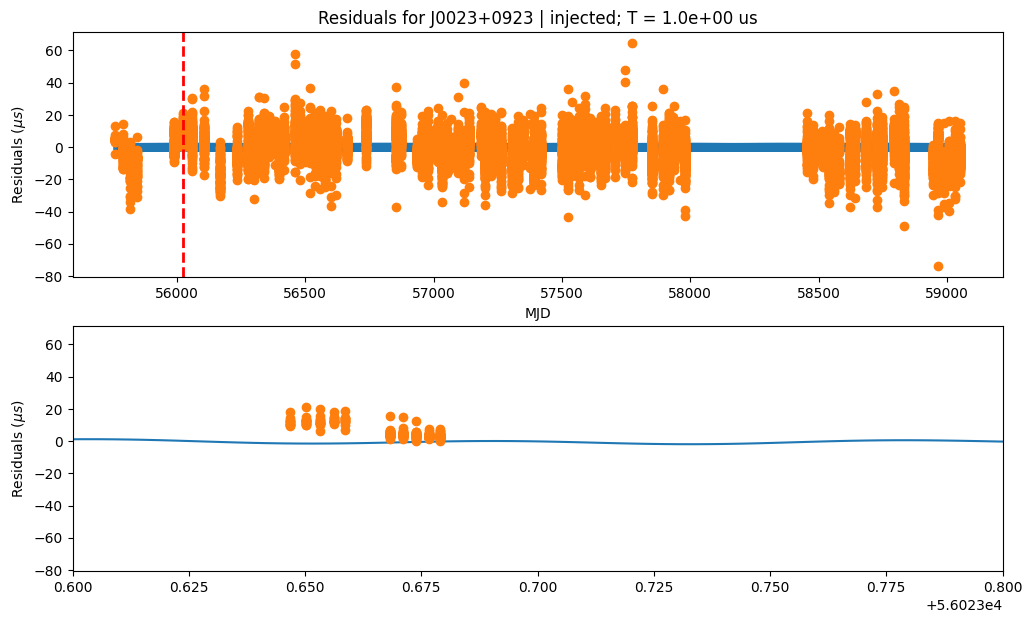

rms=8.339531530644264917 us


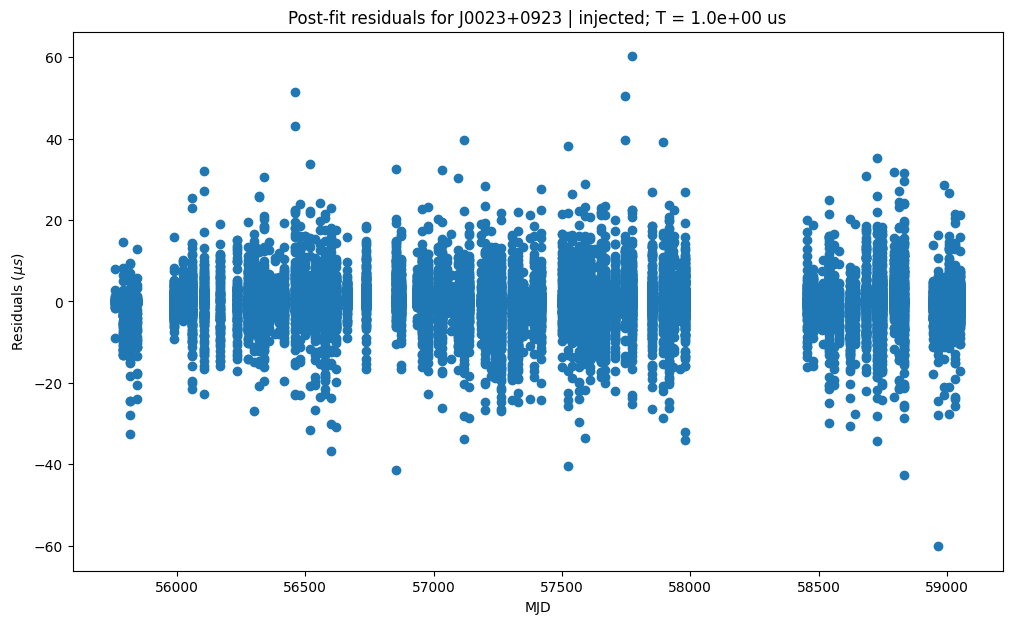

rms=5.6826563999392924677 us
tim filed saved
par file saved



B = 1.0e-05 s = 1.0e+01 us


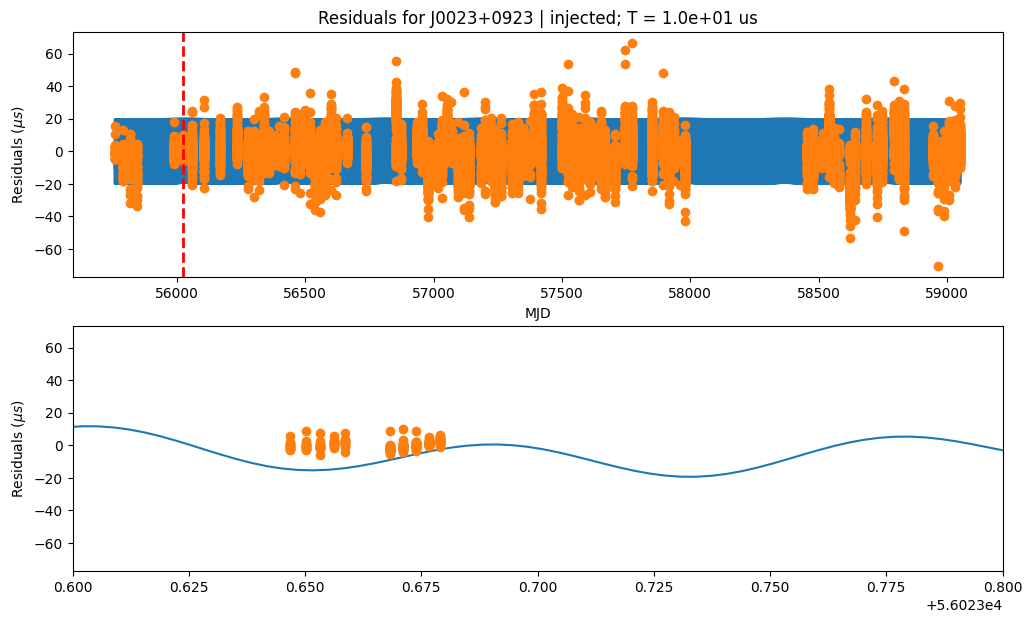

rms=9.2166865734456190715 us


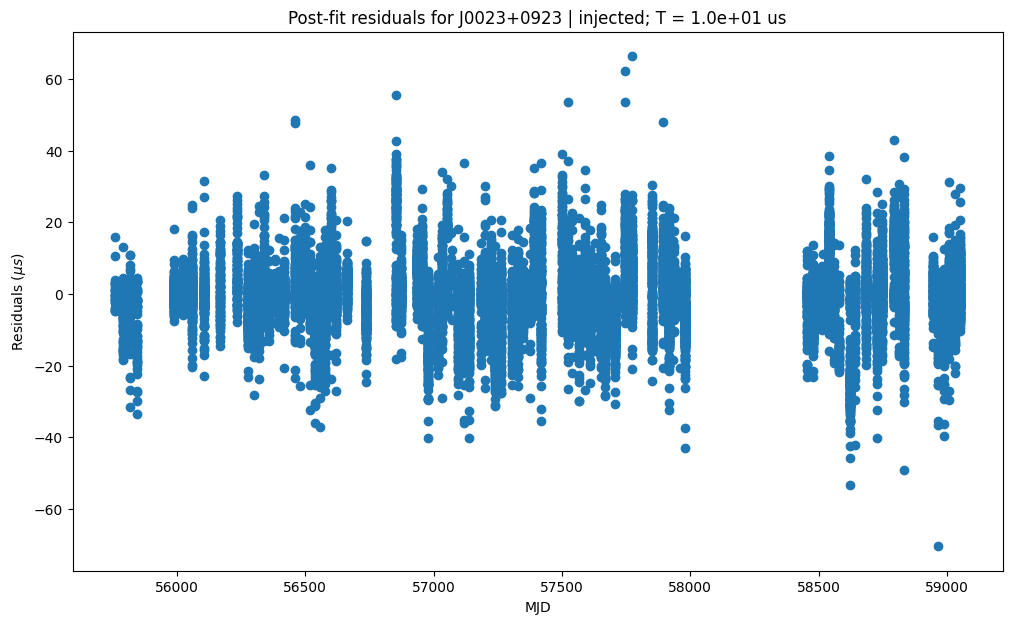

rms=9.2166865531217496005 us
tim filed saved
par file saved



B = 1.0e-04 s = 1.0e+02 us


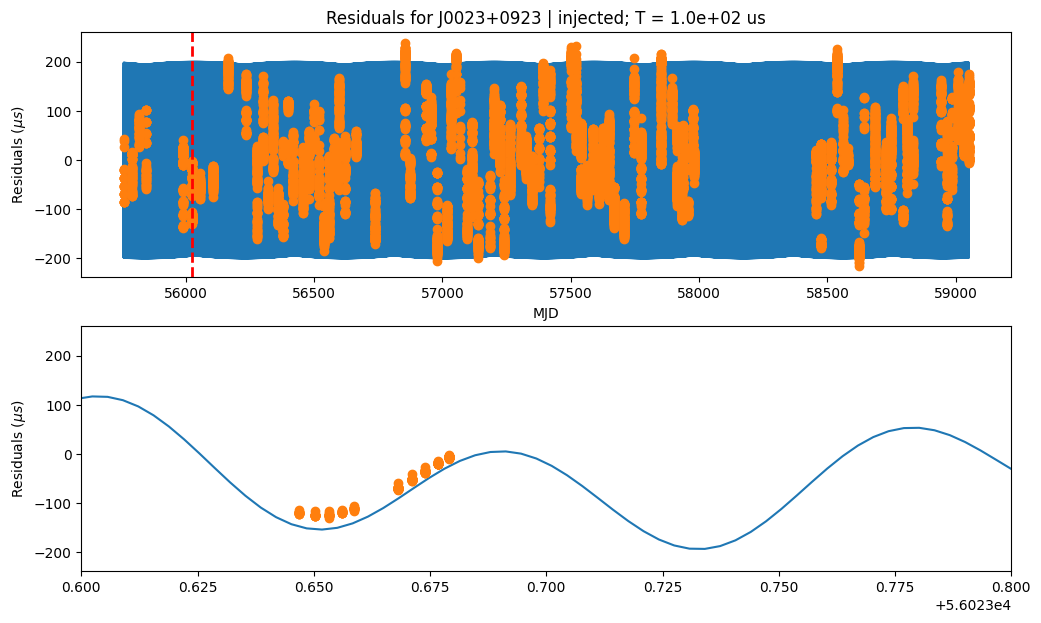

rms=90.859986820676035366 us


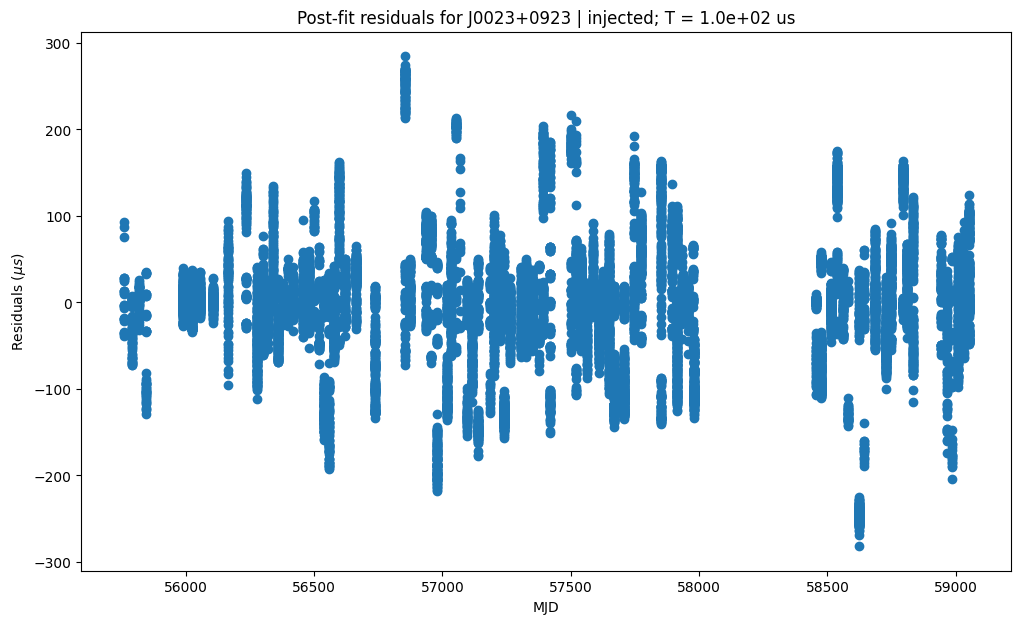

rms=72.580244012657991345 us
tim filed saved
par file saved





In [17]:
for i, B in enumerate([1e-8, 1e-7, 1e-6, 1e-5, 1e-4]):
    print(f"B = {B:.1e} s = {B*1e6:.1e} us")
    toas_injected = deepcopy(toas_perfect)
    model_injected = deepcopy(model_fit)
    mjds_injected = toas_injected.get_mjds().value
    mc_min = 0.016388

    f_b = model.FB0.value # no factor of 86400 because ENTERPRISE uses units of seconds for TOAs
    if f_b is None:
        P_b_days = model.PB.value
        P_b_seconds = P_b_days * 86400 # TODO: check this conversion number
        f_b = 1 / P_b_seconds

    n_b = f_b * np.pi*2
    # n_b = f_b * np.pi*2

    kappa = (1.4 - mc_min) / (1.4 + mc_min)
    nu_min = 1/10 * n_b/2 * np.sqrt(2 - np.sqrt(27*kappa**2 - 23))
    nu_max = n_b * np.sqrt(2)/2
    nu = nu_max * 0.9

    t = mjds_injected * 86400
    phi_plus = 1
    phi_minus = pi

    trojan_residuals = B * (np.cos((n_b+nu)*t + phi_plus) + np.cos((n_b - nu)*t + phi_minus)) # in seconds
    mjd_cont = np.linspace(min(mjds_injected), max(mjds_injected), int(1e6))
    t_cont = mjd_cont * 86400
    trojan_residuals_cont = B * (np.cos((n_b+nu)*t_cont + phi_plus) + np.cos((n_b - nu)*t_cont + phi_minus)) * 1e6 # in us

    toas_injected.adjust_TOAs(trojan_residuals * u.s)
    mjds_injected = toas_injected.get_mjds().value
    # toas_injected.tzr = True
    residuals_injected = pint.residuals.Residuals(toas_injected, model_injected).time_resids.to(u.us).value
    fig, axs = plt.subplots(2, figsize=(12, 7))
    ax = axs[0]
    ax.plot(mjd_cont, trojan_residuals_cont)
    ax.plot(mjds_perfect, residuals_injected, 'o')
    ax.set_xlabel(f"MJD")
    ax.set_ylabel("Residuals ($\mu s$)")
    ax.set_title(f"Residuals for J0023+0923 | injected; T = {B*1e6:.1e} us")
    ax.axvline(x=56023.6, color="r", linestyle="--", linewidth=2, label="zoom in area")

    ax = axs[1]
    ax.plot(mjd_cont, trojan_residuals_cont)
    ax.plot(mjds_perfect, residuals_injected, 'o')
    ax.set_xlim(56023.6, 56023.8)
    ax.set_ylabel("Residuals ($\mu s$)")

    plt.show()
    rms = np.sqrt(np.mean(residuals_injected**2))
    print(f"{rms=} us")

    model_copy = deepcopy(model_injected)
    fitter = pint.fitter.WLSFitter(toas_injected, model_copy)
    fitter.fit_toas(maxiter=4)
    model_injected_fit = fitter.model
    residuals_fit = pint.residuals.Residuals(toas_injected, model_injected_fit).time_resids.to(u.us).value
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.plot(mjds_injected, residuals_fit, 'o')
    ax.set_xlabel(f"MJD")
    ax.set_ylabel("Residuals ($\mu s$)")
    ax.set_title(f"Post-fit residuals for J0023+0923 | injected; T = {B*1e6:.1e} us")
    plt.show()

    rms = np.sqrt(np.mean(residuals_fit**2))
    print(f"{rms=} us")
    B_name = int(-np.log10(B))
    toas_injected.write_TOA_file(f"J0023+0923_synthetic_injected{B_name}.tim")
    print("tim filed saved")
    with open(f"J0023+0923_synthetic_injected{B_name}.par", "w") as file:
        file.write(model_injected_fit.as_parfile())
    print("par file saved")

    print("\n\n")
